# Verify dataset

In [162]:
%matplotlib inline
import sys
sys.path.append("..")
import cv2
import util
import matplotlib
import pylab as plt
import numpy as np
import h5py

h5 = h5py.File("../dataset/val_dataset.h5", 'r')
key = "0000011"

In [163]:
dt = h5["label"][key]
heat_result = np.reshape(dt, (57, 46,46))
heat_result.shape

(57, 46, 46)

In [164]:
dta = h5["data"][key]
dta_img = np.reshape(dta, (3, 368,368))
dta_img.shape

(3, 368, 368)

In [165]:
mask = h5["mask"][key]
mask_img = np.reshape(mask, (1, 46,46))
mask_img.shape

(1, 46, 46)

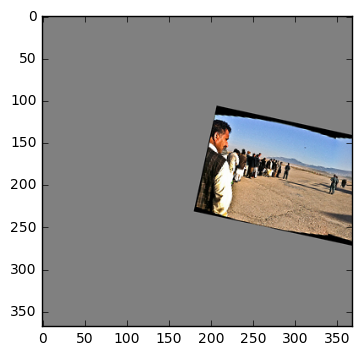

In [166]:
dta_img = np.transpose(dta_img, (1, 2, 0))
plt.imshow(dta_img[:,:,[2,1,0]])

0.0


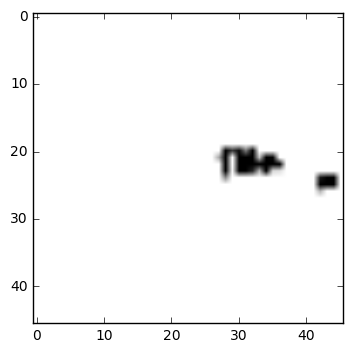

In [167]:
mask = np.transpose(mask_img, (1, 2, 0))
print(np.min(mask))
plt.imshow(mask[:,:, 0] * 255, cmap='gray')

In [168]:
scale = 1
imageToTest = cv2.resize(dta_img, (0,0), fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)
imageToTest_padded, pad = util.padRightDownCorner(imageToTest, 8, 128)

heatmap = cv2.resize(heat_result[38,:,:], (0,0), fx=8, fy=8, interpolation=cv2.INTER_CUBIC)
heatmap = heatmap[:imageToTest_padded.shape[0]-pad[2], :imageToTest_padded.shape[1]-pad[3]]
heatmap = cv2.resize(heatmap, (dta_img.shape[0], dta_img.shape[1]), interpolation=cv2.INTER_CUBIC)

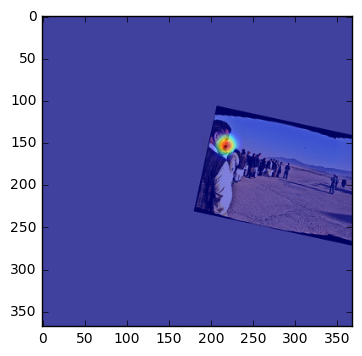

In [169]:
plt.imshow(dta_img[:,:,[2,1,0]])
plt.imshow(heatmap[:,:], alpha=.5)

# Verify data generator

In [211]:
from ds_iterator import DataIterator
di = DataIterator("../dataset/val_dataset.h5", data_shape=(3, 368, 368),
                  mask_shape=(1, 46, 46),
                  label_shape=(57, 46, 46),
                  vec_num=38, heat_num=19, batch_size=10, shuffle=True)


x,y = di.next()
x,y = di.next()
x,y = di.next()

In [212]:
y[1].shape

(10, 46, 46, 19)

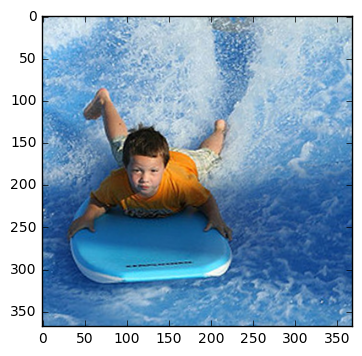

In [216]:
batch_index = 1
body_part = 0

dta_img = x[0][batch_index,:,:,:]
plt.imshow(dta_img[:,:,[2,1,0]])

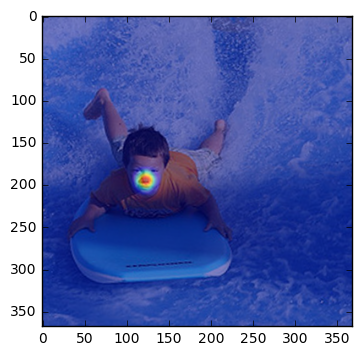

In [217]:
scale = 1
imageToTest = cv2.resize(dta_img, (0,0), fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)
imageToTest_padded, pad = util.padRightDownCorner(imageToTest, 8, 128)

heatmap = cv2.resize(y[1][batch_index, :, :, body_part], (0,0), fx=8, fy=8, interpolation=cv2.INTER_CUBIC)
heatmap = heatmap[:imageToTest_padded.shape[0]-pad[2], :imageToTest_padded.shape[1]-pad[3]]
heatmap = cv2.resize(heatmap, (dta_img.shape[0], dta_img.shape[1]), interpolation=cv2.INTER_CUBIC)

plt.imshow(dta_img[:,:,[2,1,0]])
plt.imshow(heatmap[:,:], alpha=.5)